In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2013-01-21'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-22,17.550716,17.567652,17.323069,17.506132,17.506132,152264594
1,2013-01-23,18.331041,18.655075,18.326059,18.468275,18.468275,237249950
2,2013-01-24,18.461802,18.850096,18.443619,18.784840,18.784840,135815168
3,2013-01-25,18.699162,18.891191,18.686209,18.771391,18.771391,89369729
4,2013-01-28,18.723820,18.819460,18.627430,18.698166,18.698166,65327951
...,...,...,...,...,...,...,...
2726,2023-11-17,137.820007,138.000000,135.479996,136.940002,136.940002,25565300
2727,2023-11-20,135.500000,138.425003,135.490005,137.919998,137.919998,19569400
2728,2023-11-21,137.940002,138.964996,137.705002,138.619995,138.619995,17648100
2729,2023-11-22,139.100006,141.100006,139.000000,140.020004,140.020004,17306400


In [5]:
ma_100_days = data.Close.rolling(100).mean()

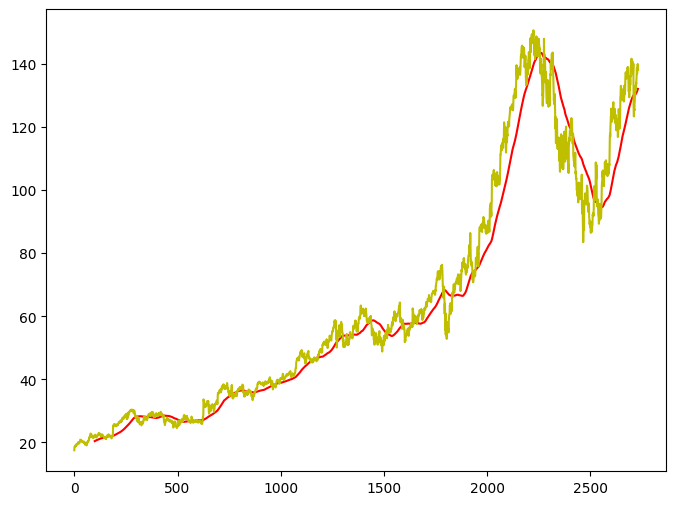

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'y')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

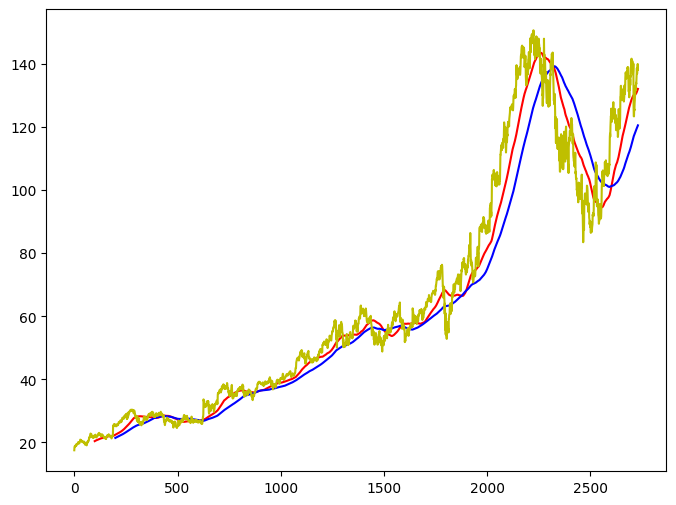

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'y')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2184

In [12]:
data_test.shape[0]

547

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [21]:
x, y = np.array(x), np.array(y)

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [26]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [28]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50

66/66 [==============================] - 11s 112ms/step - loss: 0.0250
Epoch 2/50
66/66 [==============================] - 8s 123ms/step - loss: 0.0048
Epoch 3/50
66/66 [==============================] - 8s 120ms/step - loss: 0.0037
Epoch 4/50
66/66 [==============================] - 9s 131ms/step - loss: 0.0037
Epoch 5/50
66/66 [==============================] - 12s 175ms/step - loss: 0.0042
Epoch 6/50
66/66 [==============================] - 12s 177ms/step - loss: 0.0032
Epoch 7/50
66/66 [==============================] - 12s 176ms/step - loss: 0.0030
Epoch 8/50
66/66 [==============================] - 12s 176ms/step - loss: 0.0028
Epoch 9/50
66/66 [==============================] - 12s 186ms/step - loss: 0.0028
Epoch 10/50
66/66 [==============================] - 12s 177ms/step - loss: 0.0028
Epoch 11/50
66/66 [==============================] - 12s 178ms/step - loss: 0.0023
Epoch 12/50
66/66 [==============================] - 12s 177ms/step - loss: 0.0025
Epoch 13/50
66/

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [30]:
pas_100_days = data_train.tail(100)

In [31]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [32]:
data_test_scale  =  scaler.fit_transform(data_test)

In [33]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [34]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 37ms/step


In [35]:
scale =1/scaler.scale_

In [36]:
y_predict = y_predict*scale

In [37]:
y = y*scale

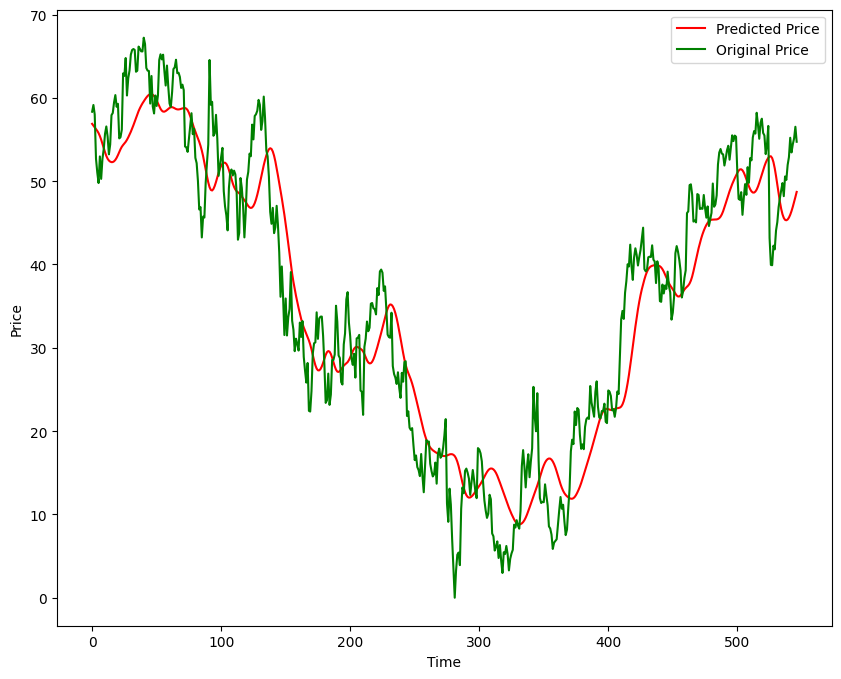

In [38]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [42]:
model.save('Stock Prediction Project.keras')